In [1]:
import fastai
fastai.__version__

'2.7.12'

In [2]:
from fastai.vision.all import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
path = untar_data(URLs.IMAGENETTE)
Path.BASE_PATH = path
path.ls()

(#3) [Path('train'),Path('noisy_imagenette.csv'),Path('val')]

In [4]:
(path/'train').ls()

(#10) [Path('train/n03417042'),Path('train/n03425413'),Path('train/n01440764'),Path('train/n02102040'),Path('train/n03888257'),Path('train/n03000684'),Path('train/n03445777'),Path('train/n03394916'),Path('train/n03028079'),Path('train/n02979186')]

In [5]:
dblock = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(460),
                   batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = dblock.dataloaders(path, bs=64)

In [6]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(2)

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd

epoch,train_loss,valid_loss,accuracy,time
0,0.228553,0.050199,0.985437,03:34


epoch,train_loss,valid_loss,accuracy,time
0,0.133131,0.058324,0.985437,03:32
1,0.084610,0.052572,0.986184,03:10


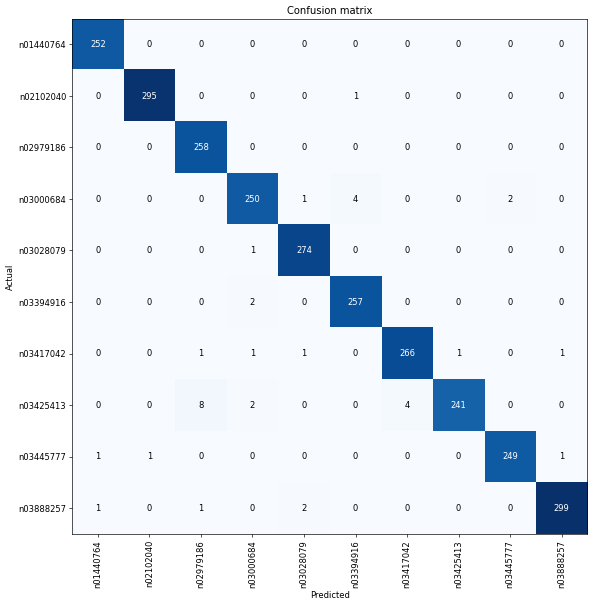

In [7]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10), dpi=60)

In [8]:
interp.most_confused(min_val=5)

[('n03425413', 'n02979186', 8)]